<a href="https://colab.research.google.com/github/neilplus21/fer2013_dl/blob/main/vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow numpy matplotlib seaborn scikit-learn
import kagglehub

# Pull the dataset — it'll be downloaded to `/root/.kagglehub/datasets/msambare/fer2013`
basedir = kagglehub.dataset_download('msambare/fer2013')
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
train_dir = f'{basedir}/train'
test_dir = f'{basedir}/test'

In [ ]:
img_rows, img_cols = 224, 224  # VGG16 expects 224x224 RGB
num_classes = 7

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/20
211/897 ━━━━━━━━━━━━━━━━━━━━ 3:14:00 17s/step - accuracy: 0.2295 - loss: 1.8366

225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step


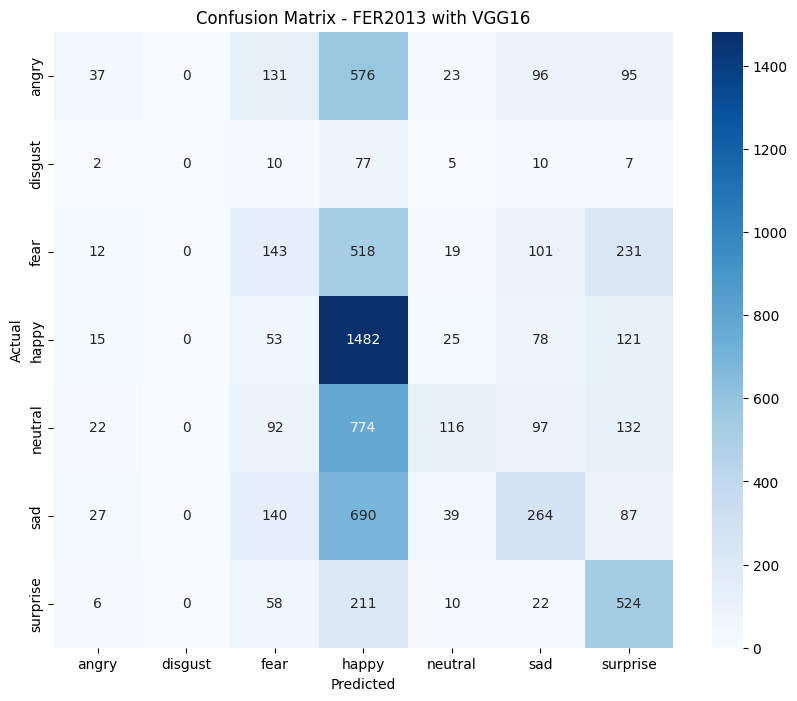

Classification Report:

              precision    recall  f1-score   support

       angry       0.31      0.04      0.07       958
     disgust       0.00      0.00      0.00       111
        fear       0.23      0.14      0.17      1024
       happy       0.34      0.84      0.49      1774
     neutral       0.49      0.09      0.16      1233
         sad       0.40      0.21      0.28      1247
    surprise       0.44      0.63      0.52       831

    accuracy                           0.36      7178
   macro avg       0.31      0.28      0.24      7178
weighted avg       0.36      0.36      0.29      7178



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Get predictions
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# 2. Get true labels
y_true = test_generator.classes

# 3. Class labels (same order as folders in test directory)
class_labels = list(test_generator.class_indices.keys())

# 4. Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 5. Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - FER2013 with VGG16')
plt.show()

# 6. Print classification report (precision, recall, f1-score)
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 2. Make sure the folder exists in your Drive
import os
drive_model_dir = '/content/drive/MyDrive/saved_models'
os.makedirs(drive_model_dir, exist_ok=True)

# 3. Save your VGG model
vgg_model.save(os.path.join(drive_model_dir, 'vgg_model_1.h5'))
print(f"VGG model saved to {drive_model_dir}/vgg_model.h5")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from tensorflow.keras.models import load_model
vgg_model = load_model('/content/drive/MyDrive/saved_models/vgg_model.h5')
